In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
t = np.linspace(1,100,100)
a = 0.5
position = (a * t**2)/2
position_noise = position + np.random.normal(0,120,size=(t.shape[0]))

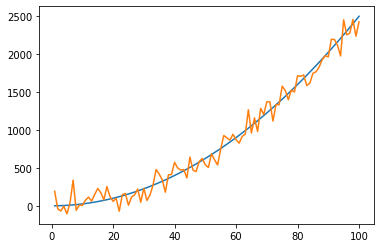

In [3]:
plt.plot(t,position, label='truth position')
plt.plot(t,position_noise, label='only use measured position')

In [4]:
predicts = [position_noise[0]]
position_predict = predicts[0]

In [5]:
predict_var = 0
odo_var = 120**2
v_std = 50

In [6]:
for i in range(1,t.shape[0]):
    dv = (position[i]-position[i-1]) + np.random.normal(0,50)
    position_predict = position_predict + dv
    predict_var += v_std**2
    # 计算卡尔曼滤波最关键的一句话！
    position_predict = position_predict*odo_var/(predict_var + odo_var)+position_noise[i]*predict_var/(predict_var+ odo_var)
    predict_var = (predict_var * odo_var)/(predict_var + odo_var)**2
    predicts.append(position_predict)

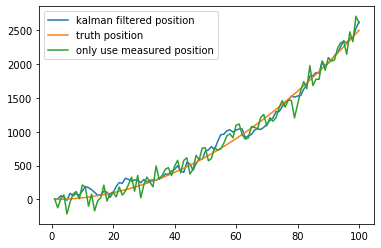

In [10]:
plt.plot(t,predicts,label='kalman filtered position')
plt.plot(t,position, label='truth position')
plt.plot(t,position_noise, label='only use measured position')
plt.legend()
plt.show()